In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
data = pd.read_csv("D:\DIAJAR\magang\\belajar program\\Python\\machine learning\\ML\\1_linear_reg\\Exercise\\canada_per_capita_income.csv")
data.tail(10)

,year,per capita income (US$)
37,2007,36144.48122
38,2008,37446.48609
39,2009,32755.17682
40,2010,38420.52289
41,2011,42334.71121
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


In [7]:
data = data.rename(columns={'year':'Tahun', 'per capita income (US$)':'Pendapatan'})

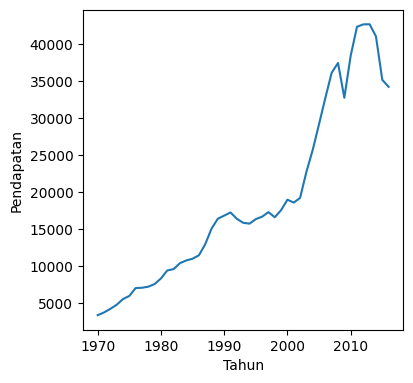

In [8]:
fig = plt.figure(figsize=(4,4), dpi=100)
axes = fig.add_axes([0.1, 0.1 , 0.8, 0.8])
axes.plot(data['Tahun'], data['Pendapatan'])
axes.set_xlabel('Tahun')
axes.set_ylabel('Pendapatan')
plt.show()

In [9]:
# model regresi linear, y = mx + b 
# di fit biar sesuai dengan yg diprediksi
reg = linear_model.LinearRegression()
reg.fit(X=data[['Tahun']], y=data['Pendapatan']) 

LinearRegression()

In [10]:
# prediksi nilai
reg.predict([[2000]]) # harus bentuk [[1],[2],....]

C:\Users\rider\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24719.39258996])

In [11]:
# gradien (m)
reg.coef_

array([828.46507522])

In [12]:
# interseksi (b)
reg.intercept_

-1632210.7578554575

In [13]:
# model score
reg.score(X=data[['Tahun']], y=data['Pendapatan'])

0.890916917957032

In [222]:
tahun_prediksi = pd.Series(range(2016,2031))
tahun_prediksi = tahun_prediksi.to_frame()
tahun_prediksi.rename(columns={0:'Tahun Prediksi'}, inplace=True)
tahun_prediksi

,Tahun Prediksi
0,2016
1,2017
2,2018
3,2019
4,2020
5,2021
6,2022
7,2023
8,2024
9,2025


In [232]:
a = []
for i in range(2016,2031):
    a += [[i]]
p = reg.predict(a)

C:\Users\stern\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [234]:
# membuat kolom baru prediksi
tahun_prediksi['Prediksi'] = p
tahun_prediksi

,Tahun Prediksi,Prediksi
0,2016,37974.833794
1,2017,38803.298869
2,2018,39631.763944
3,2019,40460.229019
4,2020,41288.694094
5,2021,42117.159170
6,2022,42945.624245
7,2023,43774.089320
8,2024,44602.554395
9,2025,45431.019471


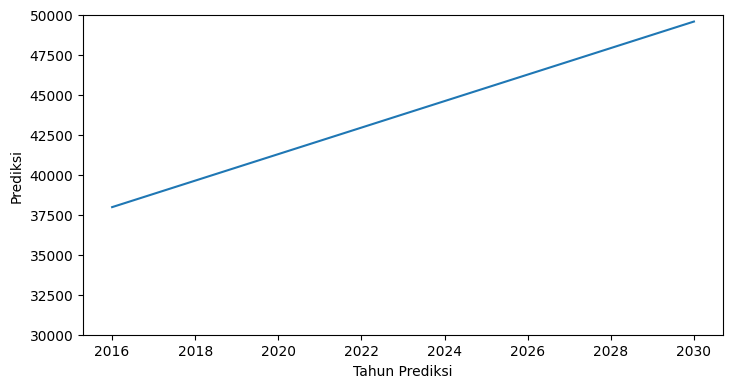

In [260]:
fig = plt.figure(figsize=(8,4), dpi=100)
axes = fig.add_axes([0.1, 0.1 , 0.8, 0.8])
axes.plot(tahun_prediksi['Tahun Prediksi'], tahun_prediksi['Prediksi'])
axes.set_ylim(30000,50000)
axes.set_xlabel('Tahun Prediksi')
axes.set_ylabel('Prediksi')
plt.show()

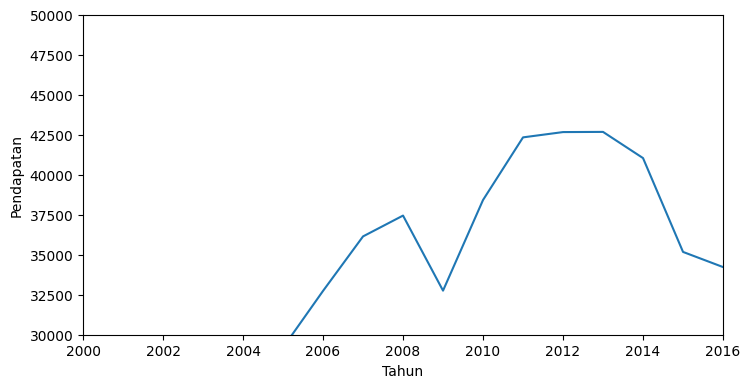

In [261]:
fig = plt.figure(figsize=(8,4), dpi=100)
axes = fig.add_axes([0.1, 0.1 , 0.8, 0.8])
axes.plot(data['Tahun'], data['Pendapatan'])
axes.set_xlabel('Tahun')
axes.set_ylabel('Pendapatan')
axes.set_xlim(2000,2016)
axes.set_ylim(30000,50000)
plt.show()

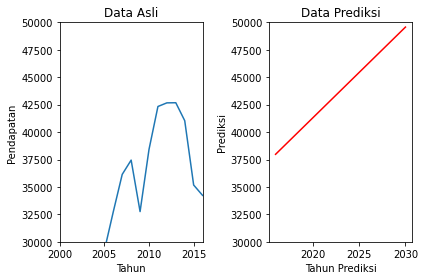

In [265]:
fig, axes = plt.subplots(1,2)
# data asli
axes[0].plot(data['Tahun'], data['Pendapatan'])
axes[0].set_xlabel('Tahun')
axes[0].set_ylabel('Pendapatan')
axes[0].set_title('Data Asli')
axes[0].set_xlim(2000,2016)
axes[0].set_ylim(30000,50000)
# data prediksi
axes[1].plot(tahun_prediksi['Tahun Prediksi'], tahun_prediksi['Prediksi'],color='Red')
axes[1].set_xlabel('Tahun Prediksi')
axes[1].set_ylabel('Prediksi')
axes[1].set_title('Data Prediksi')
axes[1].set_ylim(30000,50000)
plt.tight_layout()
